In [1]:
# %matplotlib notebook
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
ds_range = xr.open_dataset('data/processed/range-pd-sync4.nc')
subset = xr.open_dataset('data/processed/range-coarse-2020-01.nc')
elevation = subset.sel(time=slice('2020-01-02','2020-01-29T23:59:59.000000000'))

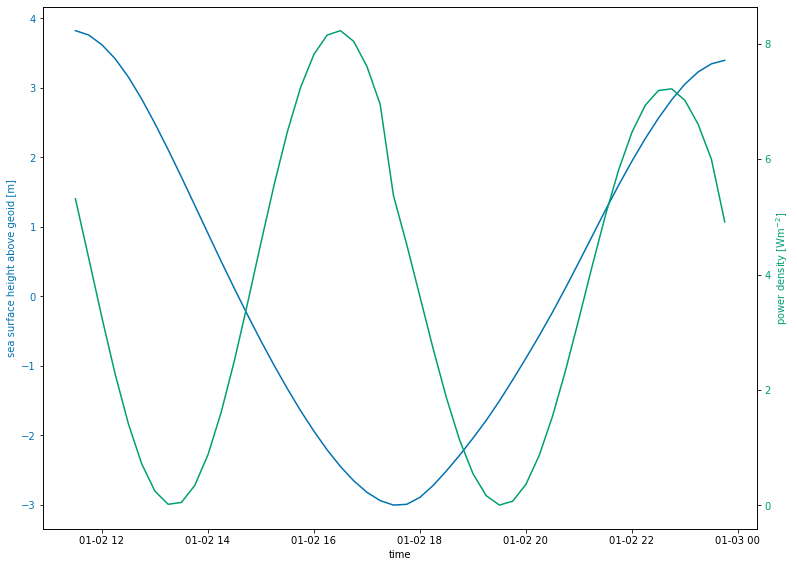

In [37]:
lat = 51.45946
latitude_idx = np.where(subset.lat.values==lat)[0][0]
lon = -2.9696970
longitude_idx = np.where(subset.lon.values==lon)[0][0]

fig,ax1 = plt.subplots(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')

color = '#0072B2'
ax1.plot(elevation.time.values[46:96],elevation.z.values[46:96,latitude_idx,longitude_idx],color=color)
ax1.set_xlabel('time')
ax1.set_ylabel('sea surface height above geoid [m]',color=color)
ax1.tick_params(axis='y',labelcolor=color)


color = '#009E73'
ax2 = ax1.twinx()
ax2.plot(ds_range.time.values[46:96],ds_range.pd.values[46:96,latitude_idx,longitude_idx],color=color)
ax2.set_ylabel('power density [Wm$\mathdefault{^{-2}}$]',color=color)
ax2.tick_params(axis='y',labelcolor=color)


# plt.savefig('figures/for-report/pdelevation-severnestuary.png')

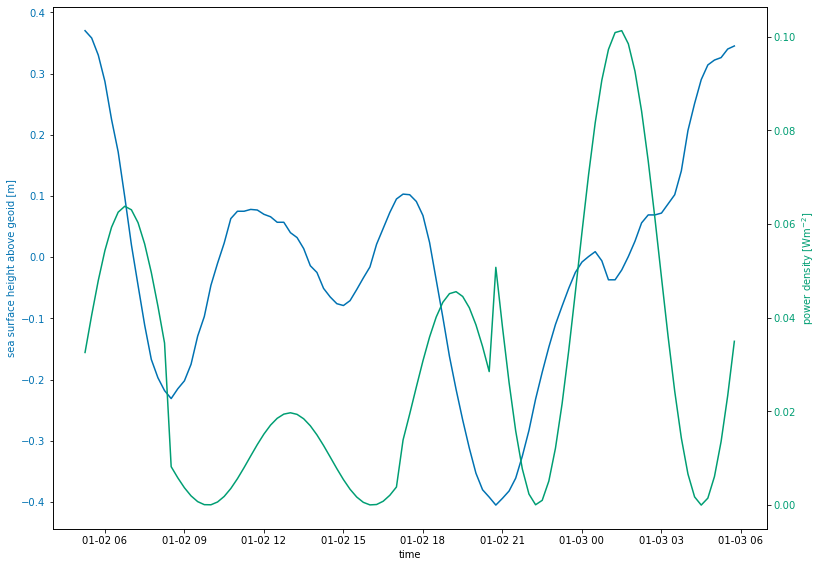

In [39]:
lat = 50.67567
latitude_idx = np.where(subset.lat.values==lat)[0][0]
lon = -1.9393940
longitude_idx = np.where(subset.lon.values==lon)[0][0]

fig,ax1 = plt.subplots(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')

color = '#0072B2'
ax1.plot(elevation.time.values[21:120],elevation.z.values[21:120,latitude_idx,longitude_idx],color=color)
ax1.set_xlabel('time')
ax1.set_ylabel('sea surface height above geoid [m]',color=color)
ax1.tick_params(axis='y',labelcolor=color)


color = '#009E73'
ax2 = ax1.twinx()
ax2.plot(ds_range.time.values[21:120],ds_range.pd.values[21:120,latitude_idx,longitude_idx],color=color)
ax2.set_ylabel('power density [Wm$\mathdefault{^{-2}}$]',color=color)
ax2.tick_params(axis='y',labelcolor=color)


# plt.savefig('figures/for-report/pdelevation-pooleharbour.png')

<IPython.core.display.Javascript object>


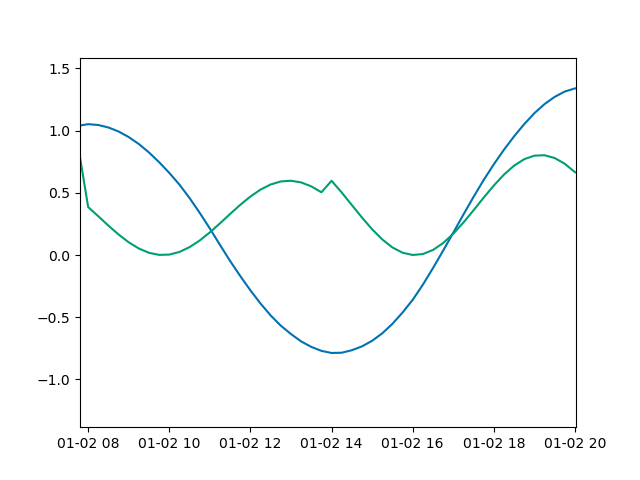

In [7]:
long = -1
lat = 55

plt.figure()
plt.style.use('seaborn-colorblind')
plt.plot(elevation.time.values,elevation.z.sel(lon=long,lat=lat,method='nearest').values)
plt.plot(ds_range.time.values,ds_range.pd.sel(lon=long,lat=lat,method='nearest').values)

<IPython.core.display.Javascript object>


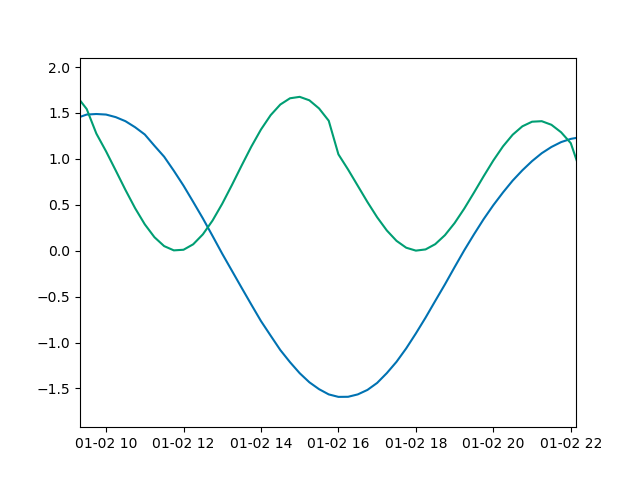

In [6]:
long = -4
lat = 49.5

plt.figure()
plt.style.use('seaborn-colorblind')
plt.plot(elevation.time.values,elevation.z.sel(lon=long,lat=lat,method='nearest').values)
plt.plot(ds_range.time.values,ds_range.pd.sel(lon=long,lat=lat,method='nearest').values)


<IPython.core.display.Javascript object>


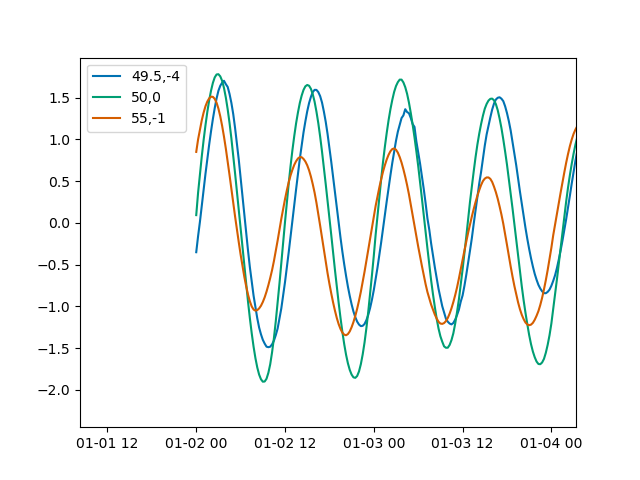

In [3]:
plt.figure()
plt.style.use('seaborn-colorblind')

long = -4
lat = 49.5
plt.plot(elevation.time.values,-elevation.z.sel(lon=long,lat=lat,method='nearest').values,label=f'{lat},{long}')

long = 0
lat = 50
plt.plot(elevation.time.values,elevation.z.sel(lon=long,lat=lat,method='nearest').values,label=f'{lat},{long}')


long = -1
lat = 55
plt.plot(elevation.time.values,-elevation.z.sel(lon=long,lat=lat,method='nearest').values,label=f'{lat},{long}')

plt.legend()


<IPython.core.display.Javascript object>


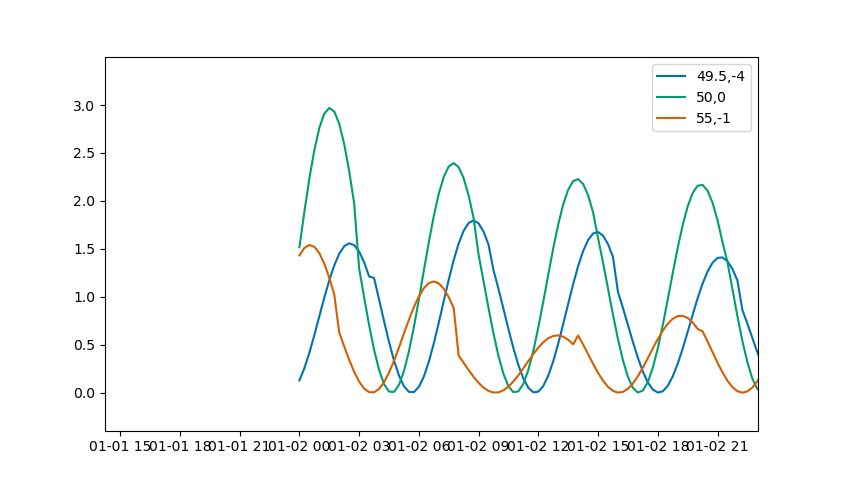

In [4]:
plt.figure()
plt.style.use('seaborn-colorblind')

long = -4
lat = 49.5
plt.plot(ds_range.time.values,ds_range.pd.sel(lon=long,lat=lat,method='nearest').values,label=f'{lat},{long}')

long = 0
lat = 50
plt.plot(ds_range.time.values,ds_range.pd.sel(lon=long,lat=lat,method='nearest').values,label=f'{lat},{long}')


long = -1
lat = 55
plt.plot(ds_range.time.values,ds_range.pd.sel(lon=long,lat=lat,method='nearest').values,label=f'{lat},{long}')

plt.legend()


In [ ]:
### steps for pure numerical modelling below

<IPython.core.display.Javascript object>


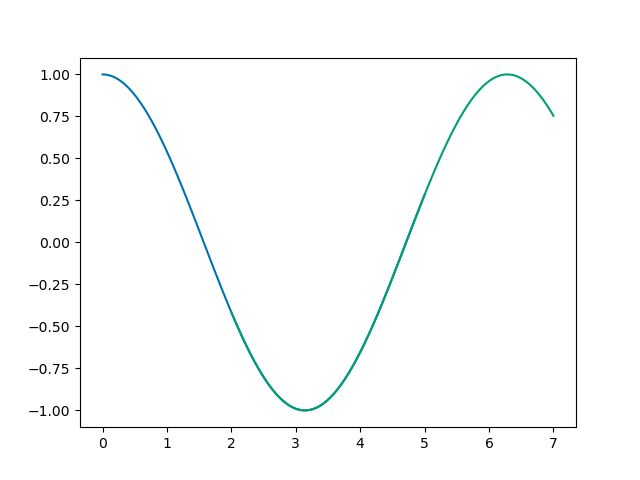

In [29]:
x1 = np.linspace(0,5,100)
x2 = np.linspace(2,7,100)

plt.figure()
plt.plot(x1,np.cos(x1))
plt.plot(x2,np.cos(x2))


<IPython.core.display.Javascript object>


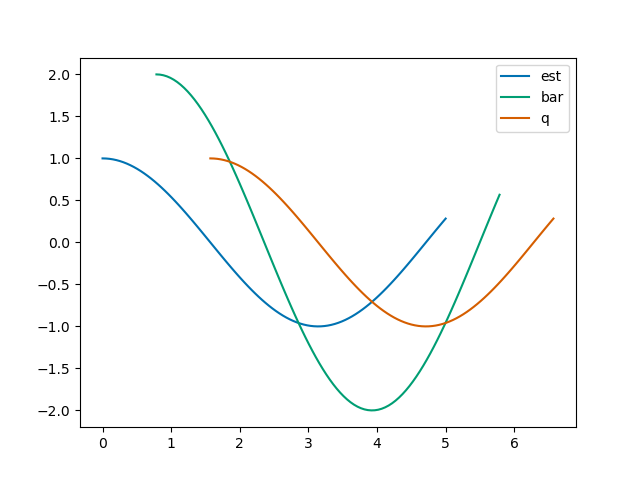

In [39]:
x1 = np.linspace(0,5,100)
y1 = np.cos(x1)
x2 = x1+np.pi/4
y2 = 2*y1
x3 = x1+np.pi/2

plt.figure()
plt.plot(x1,y1,label='est')
plt.plot(x2,y2,label='bar')
plt.plot(x3,y1,label='q')
plt.legend()

<IPython.core.display.Javascript object>


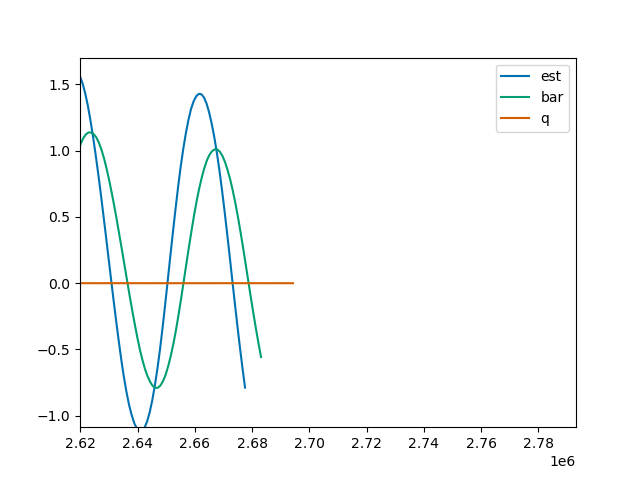

In [52]:
rho = 1025
g = 9.81
T = (12*60+25)*60
omega = np.pi*2/T 
phi = np.pi/4
epoch = np.datetime64('1970-01-01T00:00:00')



long = -1
lat = 55
est = subset.z.sel(lon=long,lat=lat,method='nearest').values
t_est = (subset.time.values-epoch)/1e9
t_est = t_est - t_est[0]
t_est = t_est.astype('float64')
t_bar = t_est + (phi/omega)
bar = est * np.cos(phi)
q = bar * omega
t_q = t_bar + (np.pi/2)/omega


plt.figure()
plt.style.use('seaborn-colorblind')
plt.plot(t_est,est,label='est')
plt.plot(t_bar,bar,label='bar')
plt.plot(t_q,q,label='q')
plt.legend()



In [56]:
lower = min(t_q)
upper = max(t_est)

# est_idx_l = np.where(est==lower)[0][0]
# est_idx_u = np.where(est==upper)[0][0]
# bar_idx_l = np.where(bar==lower)[0][0]
# bar_idx_u = np.where(bar==upper)[0][0]
# q_idx_l = np.where(q==lower)[0][0]
# q_idx_u = np.where(q==upper)[0][0]

t = t_est[t_est>=lower]
t = t[t<=upper]

In [58]:
lower

16762.5

In [59]:
t

array([  17100.,   18000.,   18900., ..., 2675700., 2676600., 2677500.])

In [60]:
upper

2677500.0

In [61]:
t = t_bar[t_bar>=lower]
t

array([  17287.5,   18187.5,   19087.5, ..., 2681287.5, 2682187.5,
       2683087.5])